In [9]:
import cv2
from find_image import FindImage
import json
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [10]:
find_image = FindImage(False)

In [11]:
img = find_image.find('50fcbd042ae9a24e3afd5cbb8e1e4542')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [12]:
face_cascade = cv2.CascadeClassifier('/home/joseph/Documentos/dog_face.xml')
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=1, minSize=(100,100))

In [13]:
with open('../data/people_and_pet_minimized.json', 'r') as file:
    dataset = json.load(file)

In [14]:
md5_pets_dogs_doberman = []
for index, value in dataset.items():
    for pet in value:
        if pet['breed_name'] == 'doberman':
            md5_pets_dogs_doberman.append(pet['image'])

In [15]:
md5_pets_dogs_doberman[0]

'50fcbd042ae9a24e3afd5cbb8e1e4542'

  0%|          | 0/463 [00:00<?, ?it/s]

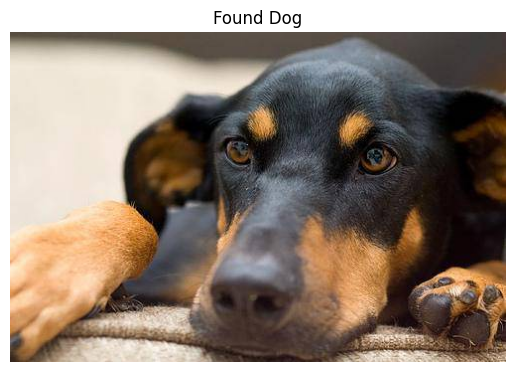

  0%|          | 0/463 [00:07<?, ?it/s]


In [16]:
diretorio_images = "/home/joseph/Documentos/sptech/tcc/grupo11-4cco-tcc/src/inteligencia_artificial/train/"

found_dog = False

for image in tqdm(md5_pets_dogs_doberman):
    known_dog = find_image.find(image)
    known_dog_gray = cv2.cvtColor(known_dog, cv2.COLOR_BGR2GRAY)

    known_face_cascade = cv2.CascadeClassifier('/home/joseph/Documentos/dog_face.xml')
    known_face_rects = face_cascade.detectMultiScale(known_dog_gray, scaleFactor=1.1, minNeighbors=1) 

    for (x, y, w, h) in known_face_rects:
        known_face_roi = known_dog_gray[y:y+h, x:x+w]
        known_face_roi = cv2.resize(known_face_roi, (150, 150))
        break
    else:
        continue
    
    for (x, y, w, h) in faces:
        face_roi = gray[y:y+h, x:x+w]
        face_roi = cv2.resize(face_roi, (150, 150))

        result = cv2.matchTemplate(known_face_roi, face_roi, cv2.TM_CCOEFF_NORMED)
        if result[0][0] > 0.35:
            found_dog = True

            plt.imshow(cv2.cvtColor(known_dog, cv2.COLOR_BGR2RGB))
            plt.title("Found Dog")
            plt.axis("off")
            plt.show()
            break

    if found_dog:
        break
